Imprting libararies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/content/matches.csv")
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
data.shape

(756, 18)

In [6]:
data.info

<bound method DataFrame.info of         id    Season  ...         umpire2                  umpire3
0        1  IPL-2017  ...        NJ Llong                      NaN
1        2  IPL-2017  ...          S Ravi                      NaN
2        3  IPL-2017  ...       CK Nandan                      NaN
3        4  IPL-2017  ...   C Shamshuddin                      NaN
4        5  IPL-2017  ...             NaN                      NaN
..     ...       ...  ...             ...                      ...
751  11347  IPL-2019  ...        O Nandan                   S Ravi
752  11412  IPL-2019  ...     Nitin Menon                Ian Gould
753  11413  IPL-2019  ...             NaN                      NaN
754  11414  IPL-2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415  IPL-2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [7]:
data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
data.isna().any()

id                 False
Season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [12]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [13]:
data['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [15]:
data.iloc[data['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [17]:
data.iloc[data['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

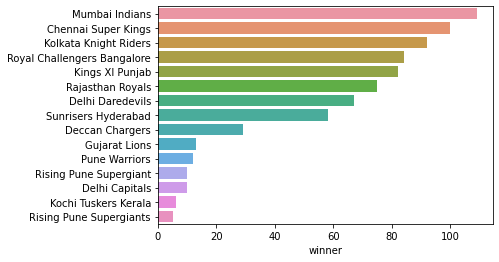

In [18]:
data1 = data.winner.value_counts()
sns.barplot(y=data1.index, x=data1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


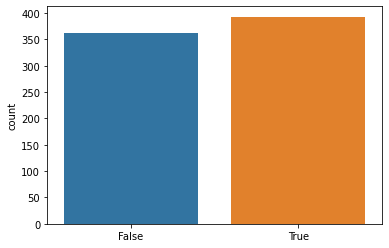

In [20]:
probability_of_winning = data['toss_winner'] == data['winner']
probability_of_winning.groupby(probability_of_winning).size()
sns.countplot(probability_of_winning)

In [21]:
data.groupby('Season')['winner'].value_counts()

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kings XI Punjab                 6
          Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [22]:
data['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
S Sreesanth        1
SW Billings        1
DL Vettori         1
SA Yadav           1
AD Mascarenhas     1
Name: player_of_match, Length: 226, dtype: int64

In [23]:
data['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Port Elizabeth      7
Ranchi              7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64